<a href="https://colab.research.google.com/github/Vishwa2488/main/blob/main/transferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tqdm
!pip install torchmetrics



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 8.7 MB/s eta 0:00:00


In [2]:
import torch

import torchmetrics
from tqdm import tqdm

from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision


device = 'cuda:0'

torch.cuda.set_device(device)

In [3]:
batch_size = 32

train_set = torchvision.datasets.CIFAR10(root = './data',
                                         train = True,
                                         download = True,
                                         transform = torchvision.transforms.ToTensor(),
                                         target_transform = None

                                         )


test_set = torchvision.datasets.CIFAR10(root = './data',
                                        train = False,
                                        download = True,
                                        transform = torchvision.transforms.ToTensor(),
                                        target_transform = None
                                        )








100%|██████████| 170498071/170498071 [00:01<00:00, 94313057.41it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
dict1 = train_set.class_to_idx

print(dict1)
map1 ={}
for key1 in dict1:
    map1[dict1[key1]] = key1

{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


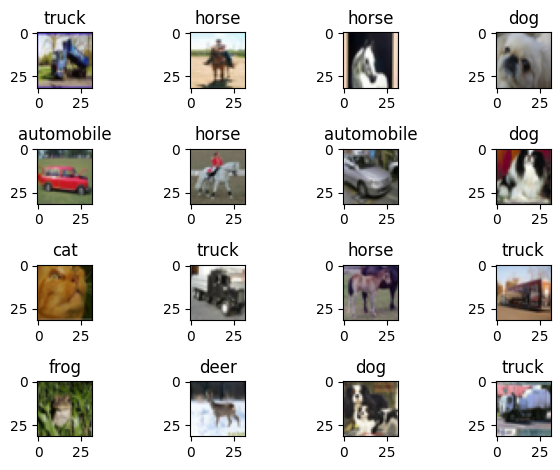

In [95]:


train_data = train_set.data.reshape((50000,3,32,32))
test_data = test_set.data.reshape((10000,3,32,32))

train_data.shape




tensor1 = torch.randint(low = 0,high = 50000,size =(4,4))

f, axarr = plt.subplots(4,4)

for i in range(4):
    for j in range(4):
        axarr[i,j].imshow(np.array(train_set.data[tensor1[i,j]]))
        axarr[i,j].title.set_text(map1[train_set.targets[tensor1[i,j]]])

f.tight_layout()


plt.show()



In [96]:
resnet = torchvision.models.resnet18(weights=True
                                     )





modified_resnet = nn.Sequential(*list(resnet.children())[:-1])

for x,param in enumerate([*list(modified_resnet.parameters())][:45]):
    print(x,param.shape)
    param.required_grad = False

print("with grad")



for j,param in enumerate([*list(modified_resnet.parameters())][45:]):
    print(x+j+1,param.shape)
    param.required_grad = True



modified_resnet.to(torch.device(device))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


0 torch.Size([64, 3, 7, 7])
1 torch.Size([64])
2 torch.Size([64])
3 torch.Size([64, 64, 3, 3])
4 torch.Size([64])
5 torch.Size([64])
6 torch.Size([64, 64, 3, 3])
7 torch.Size([64])
8 torch.Size([64])
9 torch.Size([64, 64, 3, 3])
10 torch.Size([64])
11 torch.Size([64])
12 torch.Size([64, 64, 3, 3])
13 torch.Size([64])
14 torch.Size([64])
15 torch.Size([128, 64, 3, 3])
16 torch.Size([128])
17 torch.Size([128])
18 torch.Size([128, 128, 3, 3])
19 torch.Size([128])
20 torch.Size([128])
21 torch.Size([128, 64, 1, 1])
22 torch.Size([128])
23 torch.Size([128])
24 torch.Size([128, 128, 3, 3])
25 torch.Size([128])
26 torch.Size([128])
27 torch.Size([128, 128, 3, 3])
28 torch.Size([128])
29 torch.Size([128])
30 torch.Size([256, 128, 3, 3])
31 torch.Size([256])
32 torch.Size([256])
33 torch.Size([256, 256, 3, 3])
34 torch.Size([256])
35 torch.Size([256])
36 torch.Size([256, 128, 1, 1])
37 torch.Size([256])
38 torch.Size([256])
39 torch.Size([256, 256, 3, 3])
40 torch.Size([256])
41 torch.Size([256

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [97]:
class Cifar10(nn.Module):
    def __init__(self,

                 output:int,
                 modified_resnet,
                 device = 'cpu'
                 ):
        super().__init__()

        self.stack1 = nn.Sequential(modified_resnet)


        self.stack2 =  nn.Sequential(

                                    nn.Linear(in_features = 512,
                                              out_features = 64,

                                              device = device),

                                    nn.ReLU(),
                                    nn.BatchNorm1d(num_features = 64, device = device)









                               )

        self.classifier = nn.Sequential(

            nn.Linear(in_features = 64,
                      out_features = 10,
                      device = device),


            nn.Softmax()

        )

    def forward(self,x):

        x = self.stack1(x)

        x = torch.squeeze(x)



        x = self.stack2(x)



        x = self.classifier(x)


        return x







In [98]:
BATCH_SIZE = 40

train_dataloader = torch.utils.data.DataLoader(train_set,
                                               batch_size = BATCH_SIZE,
                                               shuffle = True
                                               )
test_dataloader = torch.utils.data.DataLoader(test_set,
                                              batch_size = 40,
                                              shuffle = True
                                              )
len(train_dataloader),len(test_dataloader)

x = iter(train_dataloader)
print(x)

In [99]:
torch.manual_seed(42)

model_0 = Cifar10(10, modified_resnet,device = device)



In [100]:
X = torch.rand((40,512)).to('cuda')

y = model_0.stack2(X)

y.shape

torch.Size([40, 64])

In [101]:
X = torch.rand((40,3,32,32),device = device)

y = model_0.stack1(X)

y.shape

torch.Size([40, 512, 1, 1])

In [107]:
loss_fn = torch.nn.CrossEntropyLoss()

L1_lambda = 0.001

optimiser = torch.optim.SGD(model_0.parameters(),lr = 0.01)


accuracy_fn = torchmetrics.Accuracy(task = 'multiclass',num_classes = 10).to(device)

In [108]:
epochs = 10
torch.manual_seed(42)




for epoch in tqdm(range(epochs)):

    print("\n")

    print(f"epochs: {epoch}\n\n")


    model_0.train()



    total_loss = 0

    total_accuracy = 0



    for batch, (X,y) in enumerate(iter(train_dataloader)):

        X,y = X.to(device),y.to(device)

        y_pred = model_0.forward(X)





        loss =loss_fn(y_pred,y)



        accuracy = accuracy_fn(y_pred,y)

        total_accuracy +=accuracy



        total_loss += loss

        optimiser.zero_grad()

        loss.backward()

        optimiser.step()


        if batch%250 == 0:
            print(f"batch: {batch} \ntrain loss : {loss}, accuracy: {accuracy*100}")


    total_loss = total_loss/len(train_dataloader)

    total_accuracy = total_accuracy/len(train_dataloader)

    print(f"\n\nepoch: {epoch} completed!!\ntotal train loss : {total_loss}\ntrain accuracy : {total_accuracy*100}\n\n")



    model_0.eval()

    with torch.inference_mode():

        total_loss,total_acc = 0,0

        for X,y in test_dataloader:

            X,y = X.to(device),y.to(device)

            y_pred = model_0(X)

            loss = loss_fn(y_pred,y)

            accuracy = accuracy_fn(y_pred,y)

            total_loss += loss

            total_acc += accuracy

        total_loss = total_loss/len(test_dataloader)

        total_acc = total_acc/len(test_dataloader)

        total_acc*= 100

        print(f"total test loss : {total_loss}\ntest accuracy : {total_acc}\n\n")


        print('\n\n')






  0%|          | 0/10 [00:00<?, ?it/s]



epochs: 0


batch: 0 
train loss : 1.651476502418518, accuracy: 82.5
batch: 250 
train loss : 1.542456865310669, accuracy: 92.5
batch: 500 
train loss : 1.650345802307129, accuracy: 80.0
batch: 750 
train loss : 1.6513614654541016, accuracy: 80.0
batch: 1000 
train loss : 1.6113325357437134, accuracy: 85.0


epoch: 0 completed!!
total train loss : 1.620806097984314
train accuracy : 83.98800659179688




 10%|█         | 1/10 [00:24<03:39, 24.41s/it]

total test loss : 1.6625758409500122
test accuracy : 79.84000396728516







epochs: 1


batch: 0 
train loss : 1.54036545753479, accuracy: 92.5
batch: 250 
train loss : 1.607952356338501, accuracy: 85.0
batch: 500 
train loss : 1.6745179891586304, accuracy: 77.5
batch: 750 
train loss : 1.6360347270965576, accuracy: 82.5
batch: 1000 
train loss : 1.5576486587524414, accuracy: 90.0


epoch: 1 completed!!
total train loss : 1.6032832860946655
train accuracy : 85.72599029541016




 20%|██        | 2/10 [00:48<03:13, 24.22s/it]

total test loss : 1.6546342372894287
test accuracy : 80.66999053955078







epochs: 2


batch: 0 
train loss : 1.6862455606460571, accuracy: 77.5
batch: 250 
train loss : 1.6547319889068604, accuracy: 80.0
batch: 500 
train loss : 1.6176306009292603, accuracy: 85.0
batch: 750 
train loss : 1.5906946659088135, accuracy: 87.5
batch: 1000 
train loss : 1.5863884687423706, accuracy: 87.5


epoch: 2 completed!!
total train loss : 1.5958341360092163
train accuracy : 86.5360107421875




 30%|███       | 3/10 [01:11<02:46, 23.74s/it]

total test loss : 1.6510590314865112
test accuracy : 80.93997192382812







epochs: 3


batch: 0 
train loss : 1.6631059646606445, accuracy: 77.5
batch: 250 
train loss : 1.6587231159210205, accuracy: 80.0
batch: 500 
train loss : 1.5787090063095093, accuracy: 87.5
batch: 750 
train loss : 1.5582466125488281, accuracy: 92.5
batch: 1000 
train loss : 1.5356431007385254, accuracy: 92.5


epoch: 3 completed!!
total train loss : 1.5892561674118042
train accuracy : 87.1519775390625




 40%|████      | 4/10 [01:35<02:22, 23.77s/it]

total test loss : 1.6496614217758179
test accuracy : 81.04999542236328







epochs: 4


batch: 0 
train loss : 1.5874496698379517, accuracy: 87.5
batch: 250 
train loss : 1.635801911354065, accuracy: 82.5
batch: 500 
train loss : 1.6427552700042725, accuracy: 82.5
batch: 750 
train loss : 1.6600555181503296, accuracy: 80.0
batch: 1000 
train loss : 1.5822454690933228, accuracy: 87.5


epoch: 4 completed!!
total train loss : 1.5853095054626465
train accuracy : 87.57203674316406




 50%|█████     | 5/10 [01:59<01:58, 23.78s/it]

total test loss : 1.652415156364441
test accuracy : 80.79999542236328







epochs: 5


batch: 0 
train loss : 1.6227089166641235, accuracy: 85.0
batch: 250 
train loss : 1.5913810729980469, accuracy: 87.5
batch: 500 
train loss : 1.5361405611038208, accuracy: 92.5
batch: 750 
train loss : 1.585330605506897, accuracy: 87.5
batch: 1000 
train loss : 1.6331230401992798, accuracy: 82.5


epoch: 5 completed!!
total train loss : 1.5809370279312134
train accuracy : 87.98200225830078




 60%|██████    | 6/10 [02:23<01:35, 23.81s/it]

total test loss : 1.6471210718154907
test accuracy : 81.37004089355469







epochs: 6


batch: 0 
train loss : 1.6406314373016357, accuracy: 82.5
batch: 250 
train loss : 1.6111772060394287, accuracy: 85.0
batch: 500 
train loss : 1.5614343881607056, accuracy: 90.0
batch: 750 
train loss : 1.5540096759796143, accuracy: 90.0
batch: 1000 
train loss : 1.5196548700332642, accuracy: 95.0


epoch: 6 completed!!
total train loss : 1.578535795211792
train accuracy : 88.23401641845703




 70%|███████   | 7/10 [02:46<01:10, 23.53s/it]

total test loss : 1.6432753801345825
test accuracy : 81.71998596191406







epochs: 7


batch: 0 
train loss : 1.5017701387405396, accuracy: 97.5
batch: 250 
train loss : 1.5594085454940796, accuracy: 90.0
batch: 500 
train loss : 1.5207290649414062, accuracy: 95.0
batch: 750 
train loss : 1.5735986232757568, accuracy: 90.0
batch: 1000 
train loss : 1.6048460006713867, accuracy: 85.0


epoch: 7 completed!!
total train loss : 1.5751103162765503
train accuracy : 88.60205841064453




 80%|████████  | 8/10 [03:09<00:47, 23.63s/it]

total test loss : 1.6444588899612427
test accuracy : 81.68000030517578







epochs: 8


batch: 0 
train loss : 1.5366506576538086, accuracy: 92.5
batch: 250 
train loss : 1.5669373273849487, accuracy: 90.0
batch: 500 
train loss : 1.6835358142852783, accuracy: 77.5
batch: 750 
train loss : 1.573941707611084, accuracy: 90.0
batch: 1000 
train loss : 1.5876710414886475, accuracy: 87.5


epoch: 8 completed!!
total train loss : 1.5708123445510864
train accuracy : 89.02403259277344




 90%|█████████ | 9/10 [03:33<00:23, 23.74s/it]

total test loss : 1.6450635194778442
test accuracy : 81.55000305175781







epochs: 9


batch: 0 
train loss : 1.5465327501296997, accuracy: 92.5
batch: 250 
train loss : 1.5844244956970215, accuracy: 85.0
batch: 500 
train loss : 1.6277716159820557, accuracy: 82.5
batch: 750 
train loss : 1.609073281288147, accuracy: 85.0
batch: 1000 
train loss : 1.54054856300354, accuracy: 92.5


epoch: 9 completed!!
total train loss : 1.569185733795166
train accuracy : 89.17205047607422




100%|██████████| 10/10 [03:56<00:00, 23.66s/it]

total test loss : 1.6444193124771118
test accuracy : 81.65000915527344





